<h3> <b>Process 4: Data Visualizing</b> </h3>

<hr/>

<h4> <b>Install & Import</b> </h4>

Install & Import the necessary libraries.

In [2]:
# Install libraries
!pip install googletrans==4.0.0-rc1
!pip install langid
!pip install mtranslate


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
# from googletrans import Translator
import langid
from mtranslate import translate

<hr/>
<h4> <b>Read data & Create dataframe</b> </h4>

In [4]:
df = pd.read_csv('data/new_data.csv')
df.head()

,jobId,jobTitle,companyName,isAnonymous,isSalaryVisible,jobDescription,jobRequirement,jobLevelId,salary,salaryMax,...,address,industries,jobLevel,jobLevelVI,companySize,languageSelected,prettySalary,durationDays,numOfApplications,typeWorkingName
0,1680760,Nhân Viên Kinh Doanh MT - GT,Công Ty Cổ Phần S77 Hà Nội,False,True,1. Doanh số bán hàng\r\n- Thực hiện bán hàng t...,- Ít nhất 1 năm kinh nghiệm ở vị trí tương đươ...,5,700,700,...,Hà Nội,"{11: 'Customer Service', 32: 'Retail/Wholesale...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,0,Full-time
1,1680765,Social Media Specialist (Full Time/part-Time),Công Ty TNHH Jung Wisdom International,False,False,WE’RE HIRING: SOCIAL MEDIA SPECIALIST (FULL TI...,QUALIFICATIONS\r\n- Fluent in English (IELTS o...,5,0,0,...,"No.298, Vo Chi Cong street, Xuan La Ward, Tay ...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(25, 99)",English,Thương lượng,30,0,Full-time
2,1680758,Kế Toán Tổng Hợp,Công Ty Cổ Phần S77 Hà Nội,False,True,- Ghi nhận kiểm tra các nghiệp vụ phát sinh và...,1. Tuổi: Từ 25\r\n2. Bằng cấp: Cao đẳng/Đại Họ...,5,700,700,...,Hà Nội,"{1: 'Accounting', 58: 'Auditing', 59: 'Finance...",Experienced (non-manager),Nhân viên,"(10, 24)",Any,$500 - $700,30,0,Full-time
3,1680741,Marketing Staff,Công Ty TNHH Bán Lẻ Fujimart Việt Nam,False,False,"-\tIn charge of trade marketing activities, co...",-\tBachelor degree of Marketing/ Business Admi...,5,0,0,...,"Tầng 6, 51 Phố Lê Đại Hành, Quận Hai Bà Trưng,...","{3: 'Advertising/Promotion/PR', 27: 'Marketing...",Experienced (non-manager),Nhân viên,"(100, 499)",Any,Thương lượng,30,0,Full-time
4,1680162,Chuyên Viên Chính Quan Hệ Khách Hàng Ưu Tiên -...,Ngân Hàng TMCP Quốc Dân (Ncb),False,False,"- Thực hiện hoạt động tìm kiếm, phát triển và ...","- Tốt nghiệp chuyên ngành Tài chính-ngân hàng,...",5,0,0,...,"28C-28D Bà Triệu, Phường Hàng Bài, Hà Nội","{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",Experienced (non-manager),Nhân viên,"(100, 499)",Vietnamese,Thương lượng,30,0,Full-time


<hr/>
<h4> <b>Visualize data</b> </h4>

<h5><b><i>Question 1: </i></b</h5>

I. Which type of working do companies prefer to recruit in jobs?

II. Which the benefits do applicants usually gave by companies?

III. How big are recruiment companies?

IV. Which level the jobs require?

V. How do the range of salary in jobs?

##### *Benefits of answering questions:*

- When we have all the information above, we will easily filter the jobs which we want. 
- Besides, we will have some basic knowledge about the property, trend of VietNam labor market, from that we will have our direction in the future.

##### *Analysis to answer questions:*

##### *I. Which type of working do companies prefer to recruit in jobs?*  

In [5]:
type_working = pd.Series(df['typeWorkingName'].value_counts())
type_working

Full-time      8848
Part-time        46
Internship       29
Freelancer       26
Other            11
Seasonal         10
Online jobs       2
Name: typeWorkingName, dtype: int64

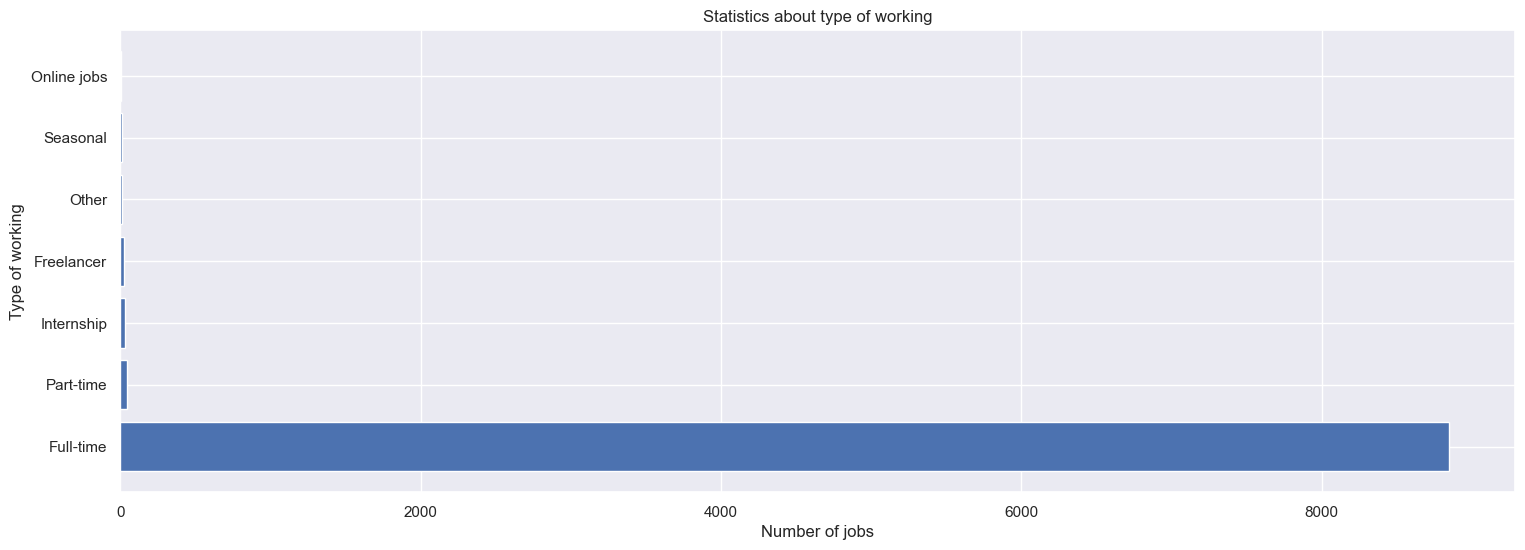

In [6]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.barh(type_working.index, type_working.values)
plt.title('Statistics about type of working')
plt.ylabel('Type of working')
plt.xlabel('Number of jobs');
plt.show()

=> I. Which type of working do companies prefer to recruit in jobs?
+ Answer: Most recruimet companies always prefer full-time jobs with more than 8000 jobs (Occupying almost all recruiment jobs)
+ Reason: With type of working is Full-time, the company will manage employee easier than other. Moreover, companies need to find fixed employees.

##### *II. Which the benefits do applicants usually gave by companies?*

In [7]:
df['benefits']

0       {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...
1       {1: 'Bonus', 2: 'Healthcare Plan', 4: 'Training'}
2       {1: 'Bonus', 2: 'Healthcare Plan', 10: 'Team A...
3       {1: 'Bonus', 2: 'Healthcare Plan', 9: 'Travel ...
4                {1: 'Bonus', 4: 'Training', 5: 'Awards'}
                              ...                        
8967              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8968              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8969    {2: 'Healthcare Plan', 3: 'Paid Leave', 10: 'T...
8970              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
8971              {1: 'Bonus', 5: 'Awards', 15: 'Others'}
Name: benefits, Length: 8972, dtype: object

In [8]:
df['benefits'] = df['benefits'].apply(eval)
benefits_data =[]
for i in df['benefits']:
    for j in i.values():
        benefits_data.append(j)

In [9]:
benefits = pd.Series(pd.Series(benefits_data).value_counts())
benefits

Bonus                   7601
Healthcare Plan         5564
Training                2542
Paid Leave              2162
Others                  2051
Travel Opportunities    1534
Team Activities         1044
Awards                   810
Transportation           792
Laptop                   614
Canteen                  375
Vouchers                 194
Mobile                    91
Library                   56
Kindergarten              29
dtype: int64

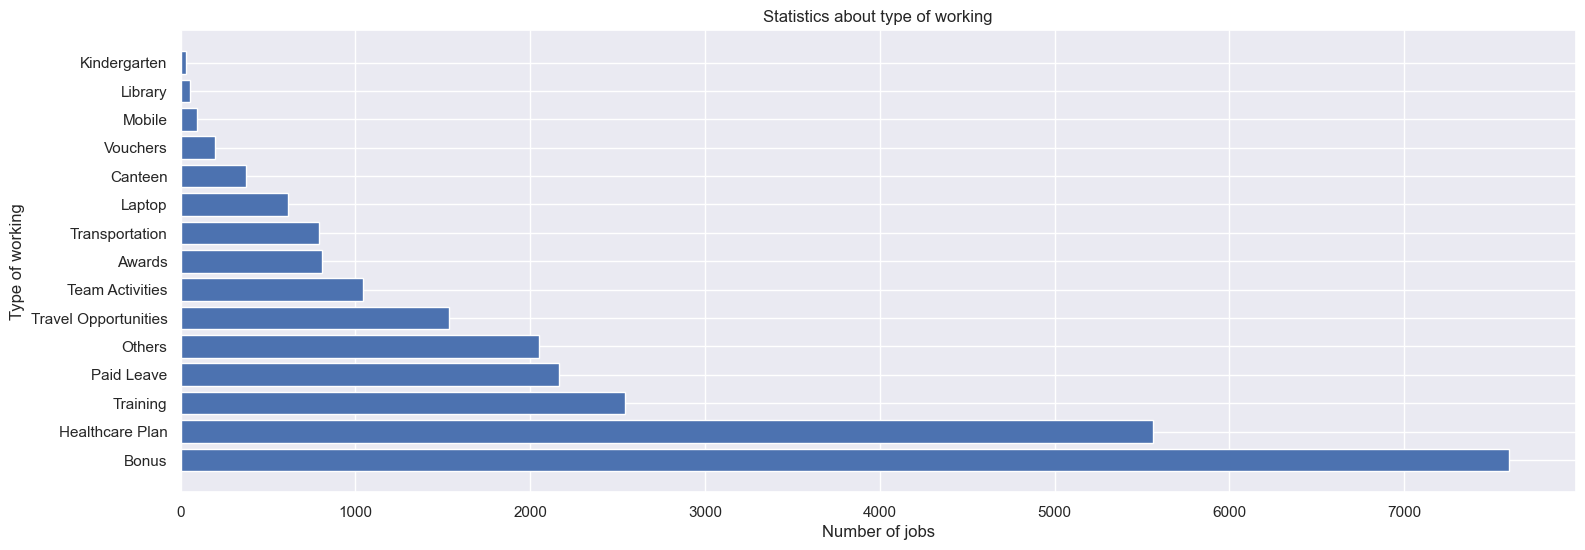

In [10]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.barh(benefits.index, benefits.values)
plt.title('Statistics about type of working')
plt.ylabel('Type of working')
plt.xlabel('Number of jobs');
plt.show()

=> II. Which the benefits do applicants usually gave by companies?
+ Answer: Most recruitment jobs usually provide "Bonus" for applicants. Besides, "Training" and "Healthcare Plan" are also provided to applicants quite a lot. 
+ Reason: This is all basic benefits which companies can easily give to applicants.

##### *III. How big are recruiment companies?*

In [11]:
company_size = pd.Series(df['companySize'].value_counts())
company_size

(100, 499)        3805
(25, 99)          1793
(1000, 4999)      1207
(500, 999)         763
(10, 24)           667
(5000, 9999)       329
(10000, 19999)     215
(0, 10)            108
(20000, 49999)      43
(50000, 99999)      42
Name: companySize, dtype: int64

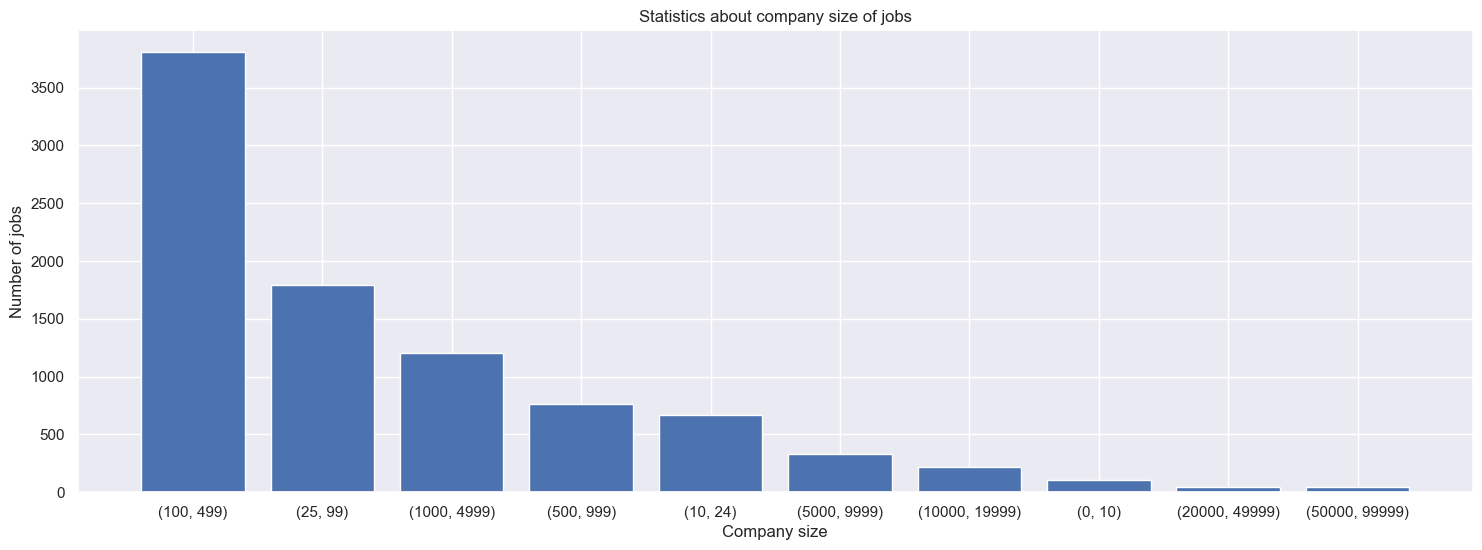

In [12]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
# sns.countplot(data = df, x = 'companySize', order = df['companySize'].value_counts().index);
plt.bar(company_size.index, company_size.values)
plt.title('Statistics about company size of jobs')
plt.xlabel('Company size')
plt.ylabel('Number of jobs');

=> III. How big are recruiment companies?
+ Answer: The company size of almost recruiment company is **100-499** and only some companies have the size **50000-99999** and **20000-49999** 
+ Reason: It exactly reflected the actual status of VietNam's labor market because the companies in VietNam primarily have small and medium size. It only has some big size companies

##### *IV. Which level the jobs require?*  

In [13]:
job_level = pd.Series(df['jobLevel'].value_counts())
job_level

Experienced (non-manager)    5956
Manager                      1461
Fresher/Entry level          1154
Director and above            236
Intern/Student                165
Name: jobLevel, dtype: int64

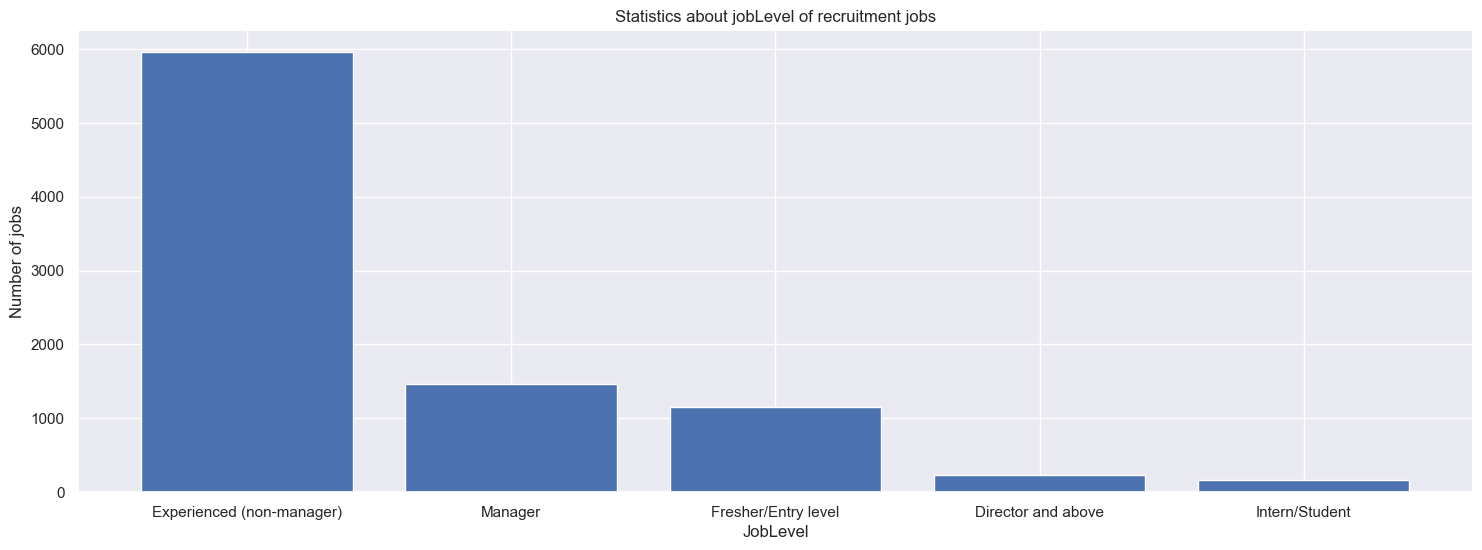

In [14]:
sns.set_theme()
fig,ax = plt.subplots(figsize = (18,6))
plt.bar(job_level.index,job_level.values)
plt.title('Statistics about jobLevel of recruitment jobs')
plt.ylabel('Number of jobs')
plt.xlabel('JobLevel');

=> IV. Which level the jobs require?
+ Answer: Most companies recruit the employees who are **Experienced (non-manager)** and few companies recruit the employees who are **Intern/Student**
+ Reason: Most companies recruit experienced employees because they want to check worker's abilities.In the opposite, number of jobs need to recruit Intern/Student is very small because it is group people who not have experiences and they need to be trained to have ability to work for company.

##### *V. How do the range of salary in jobs?*  

In [15]:
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,20000,150000000]
labels = ['(0,500]','(500,1000]','(1000,1500]','(1500,2000]','(2000,2500]','(2500,3000]','(3000,3500]','(3500,4000]','(4000,4500]',
'(4500,5000]','(5000,5500]','(5500,6000]','(6000,6500]','(6500,7000]','(7000,7500]','(7500,8000]','(8000,8500]',
'(8500,9000]','(9000,9500]','(9500,10000]','(10000,20000]','(20000,100000]']
range_of_salary = pd.cut(df['salary'],bins = bins,labels = labels).value_counts(sort = False)
range_of_salary

(0,500]            405
(500,1000]        1520
(1000,1500]        723
(1500,2000]        306
(2000,2500]        118
(2500,3000]        106
(3000,3500]         34
(3500,4000]         25
(4000,4500]          7
(4500,5000]         32
(5000,5500]          0
(5500,6000]          7
(6000,6500]          1
(6500,7000]          1
(7000,7500]          1
(7500,8000]          0
(8000,8500]          0
(8500,9000]          0
(9000,9500]          1
(9500,10000]         4
(10000,20000]        7
(20000,100000]       3
Name: salary, dtype: int64

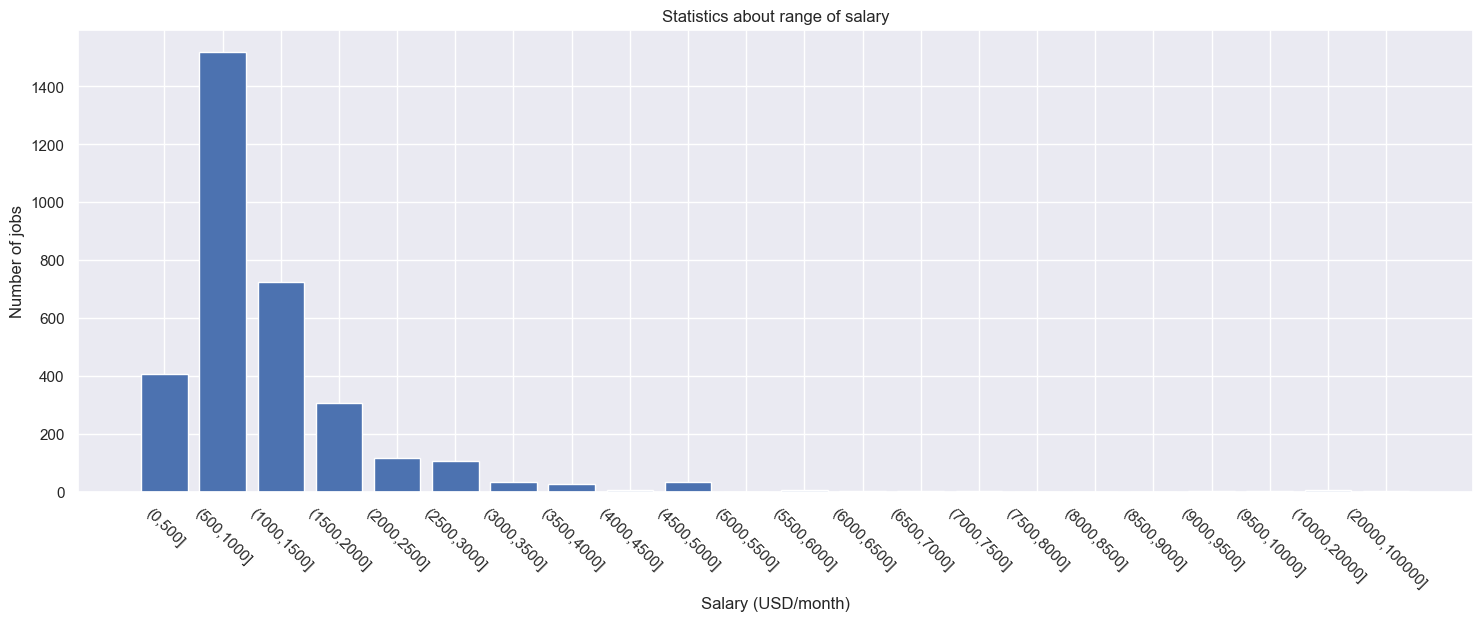

In [16]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (18,6))
plt.bar(range_of_salary.index, range_of_salary.values)
plt.title('Statistics about range of salary');
plt.xlabel('Salary (USD/month)')
plt.xticks(rotation = -45)
plt.ylabel('Number of jobs');

=> V. How do the range of salary in jobs?
+ Answer: Most the range of salary is within 500 - 1000 USD primarily . 
+ Reason: Most the companies recruit **Experienced (non-manager)** so this range of salary (500 - 1000 USD) reflected the salary which this workers will receive.

<h5><b><i>Question 2: </i></b> Find out about some interesting <b>Top 20</b> </h5>

+ Top 20 companies have the high recruitment need.
+ Top 20 industries are prefered in recruitment.
+ Top 20 working locations have the high recruitment jobs.
+ Top 20 skills are prefered in recruiment.

##### *Benefits of answering questions:*

When having this information about some Top 20 above, we can easily approach the recruiment trend and from that we can have our direction in the future, such as:

+ *Top 20 companies have the high recruitment need*: We can concentrate to apply for this companies to have chance to work in here. 
+ *Top 20 jobs are prefered in recruitment*: We can see the jobs's trend of society, from that we can choose the suitable jobs. 
+ *Top 20 working locations have the high recruitment jobs*: When we want to find jobs and don't care about working places, we can concentrate to find jobs in the locations which have the high recruitment jobs.
+ *Top 20 skills are prefered in recruiment*: We can add this prefered skills to ourselves, from that we can easily apply for this jobs we like.

##### *Analysis to answer questions:*

##### *Top 20 companies have the high recruitment need*  

In [17]:
df['companyName'].value_counts()
company_name = pd.Series(df['companyName'].value_counts())
top_20_companies = company_name[:20]

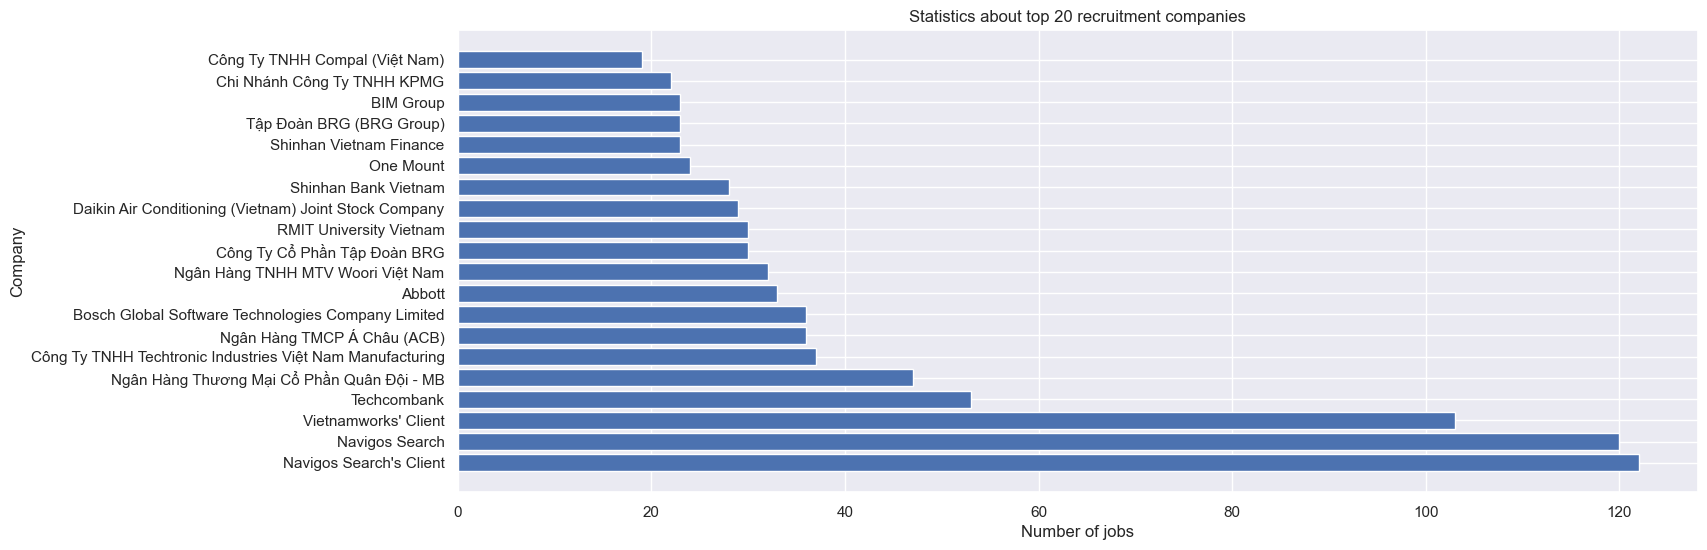

In [18]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (16,6))
# sns.barplot(y =company_name[:20].index, x = company_name[:20].values)
plt.barh(top_20_companies.index, top_20_companies.values)
plt.title('Statistics about top 20 recruitment companies')
plt.xlabel('Number of jobs')
plt.ylabel('Company');

##### *Top 20 industries are prefered in recruitment*

In [19]:
df['industries'] = df['industries'].apply(eval)
industries_data =[]
for i in df['industries']:
    for j in i.values():
        industries_data.append(j)

In [20]:
industries = pd.Series(pd.Series(industries_data).value_counts())[0:20]
industries

Sales                       1862
Finance/Investment          1405
Customer Service             989
Marketing                    962
Administrative/Clerical      940
IT - Software                913
Electrical/Electronics       831
Accounting                   811
Banking                      773
Mechanical                   688
Production/Process           681
Auditing                     672
Civil/Construction           603
Education/Training           582
Planning/Projects            573
IT - Hardware/Networking     550
Advertising/Promotion/PR     534
Sales Technical              526
Human Resources              510
Consulting                   484
dtype: int64

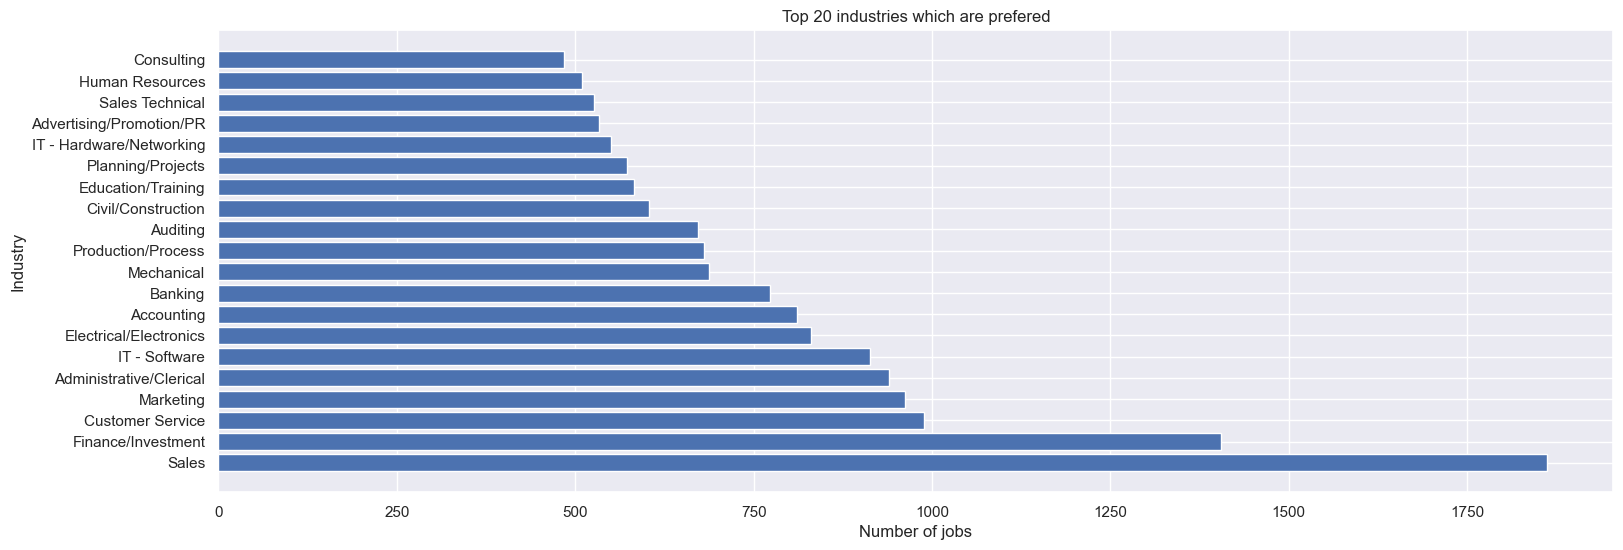

In [21]:
fig, ax = plt.subplots(figsize = (18,6))
# sns.barplot(y =industries.index, x = industries.values)
plt.barh(industries.index,industries.values)
plt.title('Top 20 industries which are prefered')
plt.xlabel('Number of jobs')
plt.ylabel('Industry');

##### *Top 20 working locations have the high recruitment jobs*

In [22]:
df['workingLocations'] = df['workingLocations'].apply(eval)
locations_data =[]
for i in df['workingLocations']:
    for j in i.values():
        locations_data.append(j)

In [23]:
locations = pd.Series(pd.Series(locations_data).value_counts())[0:20]
locations

Hà Nội               3980
Hồ Chí Minh          3949
Hải Phòng             278
Bình Dương            277
Bắc Ninh              266
Hưng Yên              239
Đồng Nai              214
Đà Nẵng               193
Hải Dương             190
Hà Nam                108
Long An                93
Bắc Giang              93
Bà Rịa - Vũng Tàu      91
Vĩnh Phúc              88
Cần Thơ                50
Quảng Nam              46
Quốc tế                44
Quảng Ninh             40
Thái Nguyên            39
Thanh Hóa              39
dtype: int64

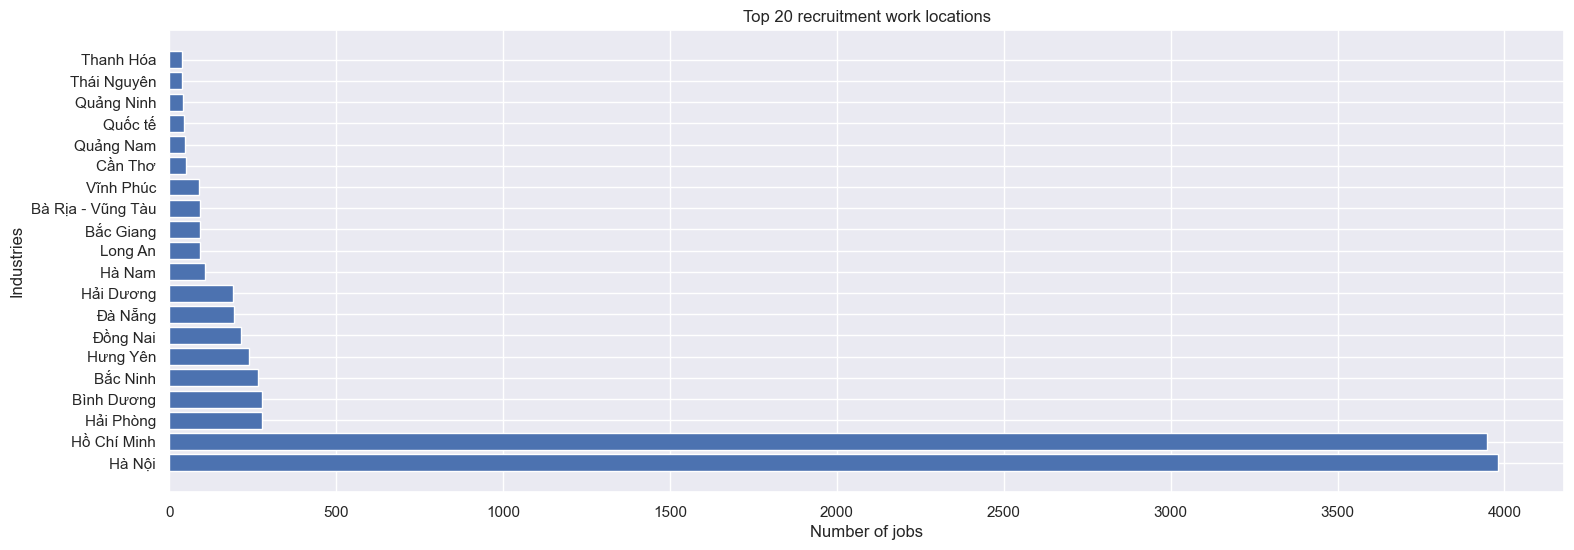

In [24]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (18,6))
# sns.barplot(y =locations.index, x = locations.values)
plt.barh(locations.index,locations.values)
plt.title('Top 20 recruitment work locations')
plt.xlabel('Number of jobs')
plt.ylabel('Industries');

##### *Top 20 skills are prefered in recruiment*

In [25]:
df['skills'] = df['skills'].apply(eval)
skills_data =[]
for i in df['skills']:
    for j in i.values():
        skills_data.append(j)

In [26]:
skills = pd.Series(pd.Series(skills_data).value_counts())[0:20]
skills

English                 782
Kinh Doanh              583
Chăm Sóc Khách Hàng     516
Bán Hàng                504
Tiếng Anh               494
Tìm Kiếm Khách Hàng     330
AutoCAD                 257
Business Development    253
Kế Toán                 247
Communication           232
Tài Chính               225
Digital Marketing       205
Customer Service        200
Tư Vấn                  196
Tiếng Trung             184
Accounting              176
Kế Toán Tổng Hợp        162
Cơ Khí                  145
Kiểm Toán               138
Ngân Hàng               138
dtype: int64

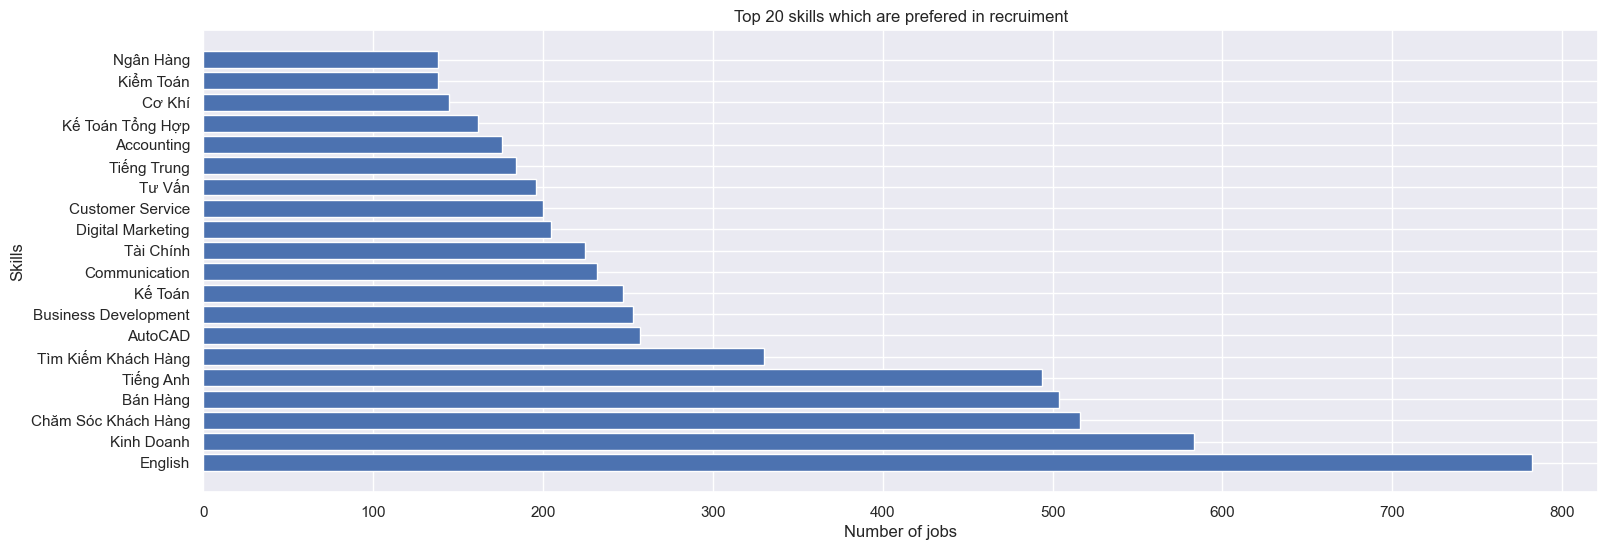

In [27]:
sns.set_theme()
fig, ax = plt.subplots(figsize = (18,6))
# sns.barplot(y =skills.index, x = skills.values)
plt.barh(skills.index,skills.values)
plt.title('Top 20 skills which are prefered in recruiment')
plt.xlabel('Number of jobs')
plt.ylabel('Skills');

<h5><b><i>Question 3: </i></b> The primary concentrated location of jobs, the average income of these areas</h5>

##### *Benefits of answering questions:*

When having this information, each group of people has an their benefits for them, such as:

+ *For students, workers*: Identifying some locations which have a lot of job's chance and if you are working in another location, you can see this average income of this location, from that, you can think about staying or finding another suitable jobs.

+ *For employers, investors*: Identifying the information about labor's market. From that, opening the extra branch at those location.

+ *For local government*: Identifying the information of some provinces which have the high average income, from that they can find the solution to improve this labor market's status of their own province. 


##### *Analysis to answer questions:*

In [28]:
df[df['isSalaryVisible'] == True]['isSalaryVisible'].count()
# Because a lot of value of salary are "Thương lượng", so we will only
# use data which has the range of salary exactly
temp_df = df[df['isSalaryVisible'] == True]

In [29]:
locations_salary_df = temp_df[['workingLocations','salary']].copy()
locations_salary_df['workingLocations'] = locations_salary_df['workingLocations']\
                                    .astype(str)\
                                    .apply(lambda x: list(ast.literal_eval(x).values()))
locations_salary_df = locations_salary_df.explode('workingLocations')

In [30]:
avg_salary = round(locations_salary_df.groupby('workingLocations')['salary'].mean().reset_index())
avg_salary = avg_salary.rename(columns = {'salary': 'avgsalary'})
avg_salary

,workingLocations,avgsalary
0,An Giang,1750.0
1,Bà Rịa - Vũng Tàu,1191.0
2,Bình Dương,1166.0
3,Bình Phước,875.0
4,Bình Thuận,960.0
5,Bình Định,1992.0
6,Bạc Liêu,1125.0
7,Bắc Giang,1109.0
8,Bắc Kạn,1500.0
9,Bắc Ninh,1042.0


In [31]:
locations_jobs = locations_salary_df.groupby('workingLocations').count().reset_index()
locations_jobs = locations_jobs.rename(columns = {'salary': 'numberOfjobs'})
locations_jobs

,workingLocations,numberOfjobs
0,An Giang,2
1,Bà Rịa - Vũng Tàu,25
2,Bình Dương,62
3,Bình Phước,8
4,Bình Thuận,2
5,Bình Định,6
6,Bạc Liêu,2
7,Bắc Giang,46
8,Bắc Kạn,2
9,Bắc Ninh,101


In [32]:
locations_df = pd.concat([locations_jobs, avg_salary['avgsalary']], axis=1)
locations_df

,workingLocations,numberOfjobs,avgsalary
0,An Giang,2,1750.0
1,Bà Rịa - Vũng Tàu,25,1191.0
2,Bình Dương,62,1166.0
3,Bình Phước,8,875.0
4,Bình Thuận,2,960.0
5,Bình Định,6,1992.0
6,Bạc Liêu,2,1125.0
7,Bắc Giang,46,1109.0
8,Bắc Kạn,2,1500.0
9,Bắc Ninh,101,1042.0


##### **Provinces which have the highest average salary**

In [33]:
locations_avg_salary_df = locations_df.sort_values\
                    (by = 'avgsalary', ascending = False)[:10]

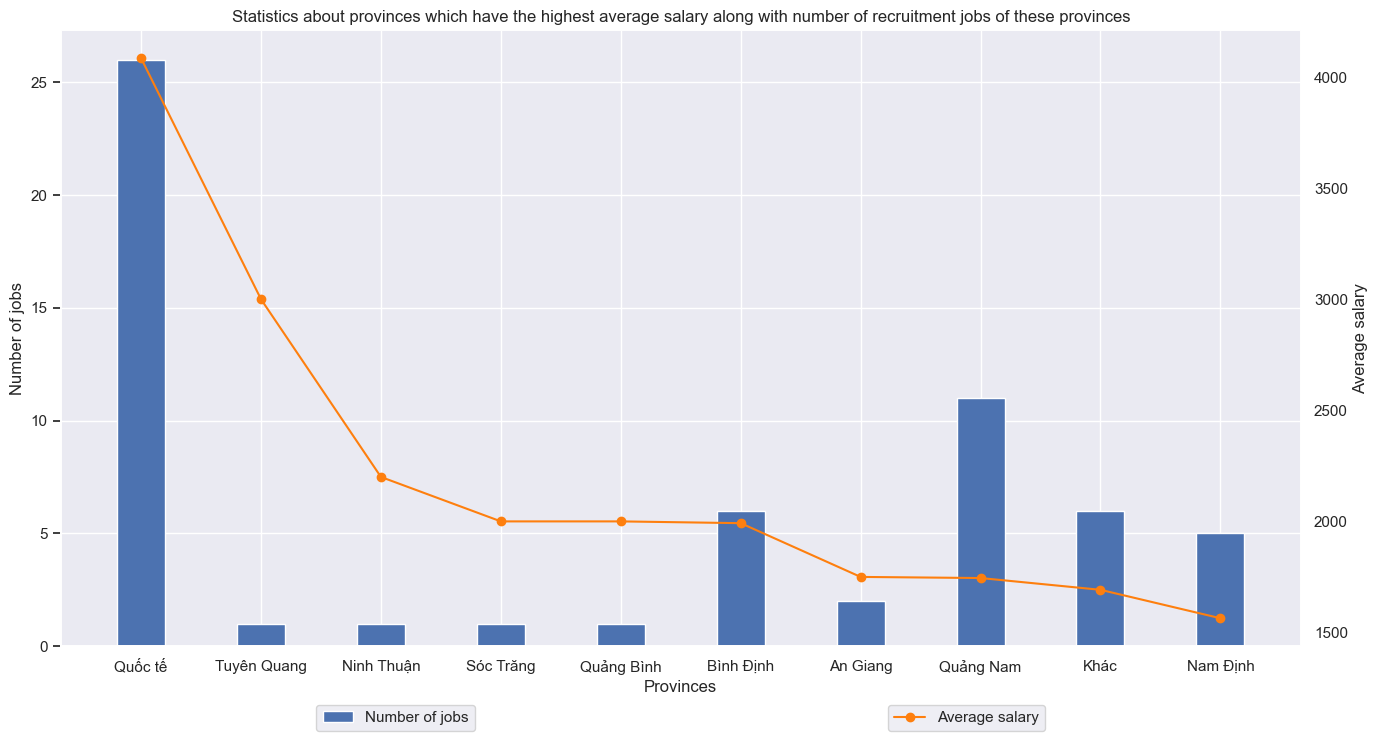

In [34]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(locations_avg_salary_df['workingLocations'],\
        locations_avg_salary_df['numberOfjobs'],width = 0.4)
ax.set_xlabel('Provinces')
ax.set_ylabel('Number of jobs')
ax.tick_params(left=False)
ax.legend(['Number of jobs'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twinx()
ax2.plot(locations_avg_salary_df['workingLocations'],\
          locations_avg_salary_df['avgsalary'],marker='o',color='#fe7f0e')
ax2.set_ylabel('Average salary')
ax2.grid(False)
ax2.tick_params(right=False)
ax2.legend(['Average salary'],loc='lower right',bbox_to_anchor=(0.8, -0.15))

plt.title('Statistics about provinces which have the highest average salary \
along with number of recruitment jobs of these provinces')
plt.show()

##### **Review:**

We can see the highest average salary is not from center provinces, it is from *Quốc tế*, *Tuyên Quang*, *Ninh Thuận*, but the number of jobs these provinces are recruit is very small so we shouldn't find a job in these provinces (Because it will be competitieve). Besides, if you have a job in these provinces, you should continue to do these jobs.

##### **Provinces which have the highest number of jobs**

In [35]:
locations_number_jobs_df = locations_df.sort_values\
                    (by = 'numberOfjobs', ascending = False)[:10]

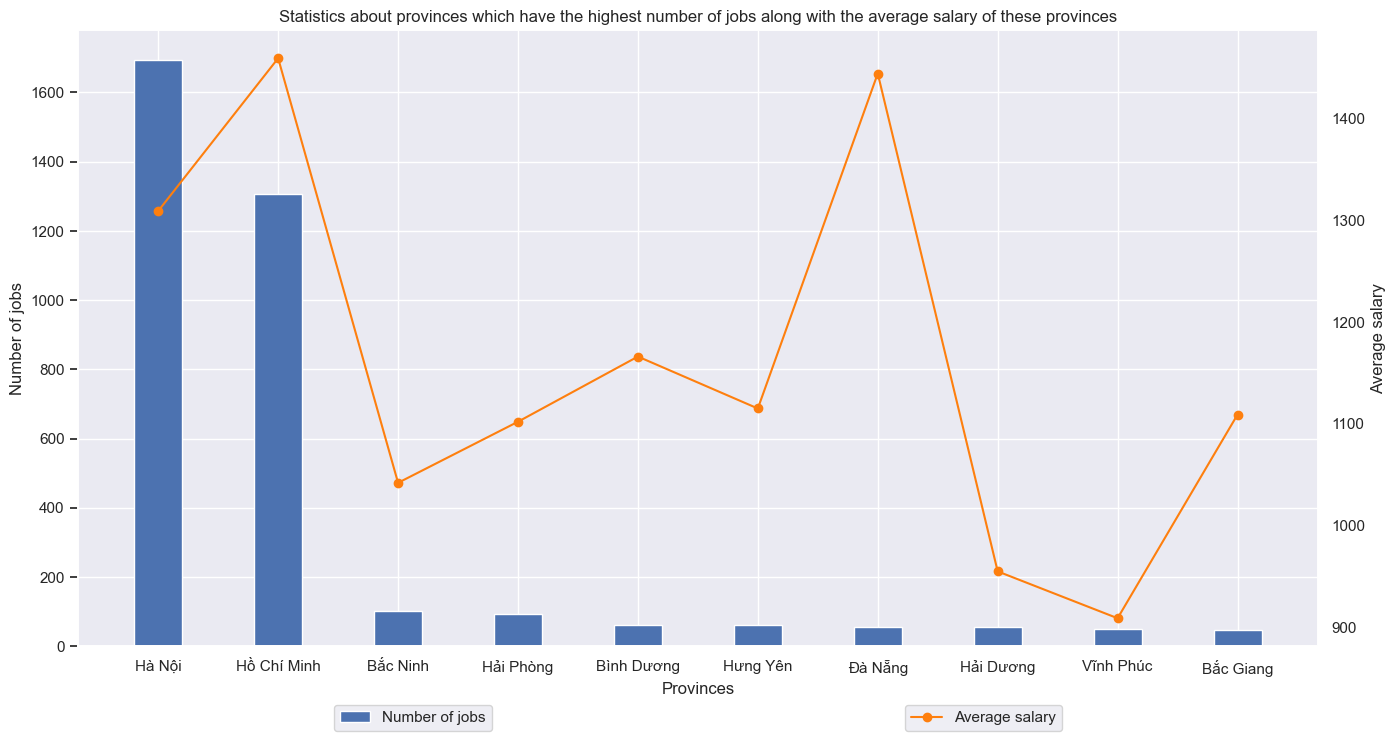

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(locations_number_jobs_df['workingLocations'], \
       locations_number_jobs_df['numberOfjobs'],width = 0.4)
ax.set_xlabel('Provinces')
ax.set_ylabel('Number of jobs')
ax.tick_params(left=False)
ax.legend(['Number of jobs'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twinx()
ax2.plot(locations_number_jobs_df['workingLocations'], \
         locations_number_jobs_df['avgsalary'],marker='o',color='#fe7f0e')
ax2.set_ylabel('Average salary')
ax2.grid(False)
ax2.tick_params(right=False)
ax2.legend(['Average salary'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.title('Statistics about provinces which have the highest number of jobs \
along with the average salary of these provinces')
plt.show()

##### **Review:**

+ As we see in the graph, *Hồ Chí Minh* and *Hà Nội* always are the locations which have the most recruitment jobs. Because these are the center provinces in Viet Nam so these places have a lot of residential, school, urban,... so these places are improved a lot about the infrastructure, traffic and having a lot of investment policies from abroad.

+ From that, you can consider choosing to find a job from *Hồ Chí Minh* or *Hà Nội*, but I recommend you choose *Hồ Chí Minh*, because it has the highest average salary. Besides, *Đà Nẵng* is not a bad choice for finding jobs because another provinces have almost the same number of jobs but *Đà Nẵng* has the highest average salary among these provinces.


<h5><b><i>Question 4: </i></b> The industries have the highest recruitment jobs and number of application of each industry</h5>

##### *Benefits of answering questions:*

When having this information, each group of people has an their own benefits for them, such as: 

+ For *students, workers*: Identifying the industries which have a lot of recruitment jobs and number of applications. From that, we will direct to choose jobs, study's strategy for ourselves to be suitable for current market trend. For workers, if they don't feel satisfied with their current job, they can base on this question to choose these suitable jobs.

+ For *universities, training centers*: Opening more training fields for the trending industries. 


##### *Analysis to answer questions:*

In [37]:
temp_df = df[df['numOfApplications'] != 0]
temp_df[['industries','numOfApplications']]

,industries,numOfApplications
7,"{7: 'Civil/Construction', 64: 'Electrical/Elec...",19
8,"{33: 'Sales', 42: 'Banking', 59: 'Finance/Inve...",196
9,"{17: 'Executive management', 33: 'Sales', 69: ...",51
18,"{12: 'Education/Training', 47: 'Interpreter/Tr...",23
19,"{23: 'Human Resources', 30: 'Real Estate', 73:...",39
...,...,...
8967,"{8: 'Consulting', 58: 'Auditing', 69: 'Plannin...",7
8968,"{8: 'Consulting', 58: 'Auditing', 69: 'Plannin...",7
8969,"{19: 'Export-Import', 36: 'Freight/Logistics'}",4
8970,"{8: 'Consulting', 11: 'Customer Service', 58: ...",6


In [38]:
industries_napp_df = temp_df[['industries','numOfApplications']].copy()
industries_napp_df['industries'] = industries_napp_df['industries']\
                                    .astype(str)\
                                    .apply(lambda x: list(ast.literal_eval(x).values()))
industries_napp_df = industries_napp_df.explode('industries')
industries_napp_df

,industries,numOfApplications
7,Civil/Construction,19
7,Electrical/Electronics,19
7,Mechanical,19
8,Sales,196
8,Banking,196
...,...,...
8970,Customer Service,6
8970,Auditing,6
8971,Consulting,6
8971,Auditing,6


In [39]:
industries_njobs = industries_napp_df.groupby('industries').count().reset_index()
industries_njobs = industries_njobs.rename(columns = {'numOfApplications': 'numOfJobs'})
industries_njobs

,industries,numOfJobs
0,Accounting,672
1,Administrative/Clerical,743
2,Advertising/Promotion/PR,424
3,Agriculture/Forestry,47
4,Airlines/Tourism,118
...,...,...
67,TV/Media/Newspaper,181
68,Telecommunications,105
69,Temporary/Contract,12
70,Textiles/Garments/Footwear,132


In [40]:
industries_napp = industries_napp_df.groupby('industries').sum().reset_index()
industries_napp = industries_napp.rename(columns = {'numOfApplications': 'totalOfApplications'})
industries_napp

,industries,totalOfApplications
0,Accounting,34059
1,Administrative/Clerical,43607
2,Advertising/Promotion/PR,19944
3,Agriculture/Forestry,1326
4,Airlines/Tourism,3179
...,...,...
67,TV/Media/Newspaper,8886
68,Telecommunications,2619
69,Temporary/Contract,905
70,Textiles/Garments/Footwear,4952


In [41]:
industries_df = pd.concat([industries_njobs, industries_napp['totalOfApplications']], axis=1)
industries_df

,industries,numOfJobs,totalOfApplications
0,Accounting,672,34059
1,Administrative/Clerical,743,43607
2,Advertising/Promotion/PR,424,19944
3,Agriculture/Forestry,47,1326
4,Airlines/Tourism,118,3179
...,...,...,...
67,TV/Media/Newspaper,181,8886
68,Telecommunications,105,2619
69,Temporary/Contract,12,905
70,Textiles/Garments/Footwear,132,4952


##### *Top 10 industries which have high number of jobs*

In [42]:
industries_highnjobs_df = industries_df.sort_values\
                    (by = 'numOfJobs', ascending = False)[:10]
industries_highnjobs_df

,industries,numOfJobs,totalOfApplications
64,Sales,1505,52059
26,Finance/Investment,1117,49998
47,Marketing,778,37414
13,Customer Service,774,28804
1,Administrative/Clerical,743,43607
0,Accounting,672,34059
38,IT - Software,649,19723
18,Electrical/Electronics,632,24116
9,Banking,580,23551
7,Auditing,555,26217


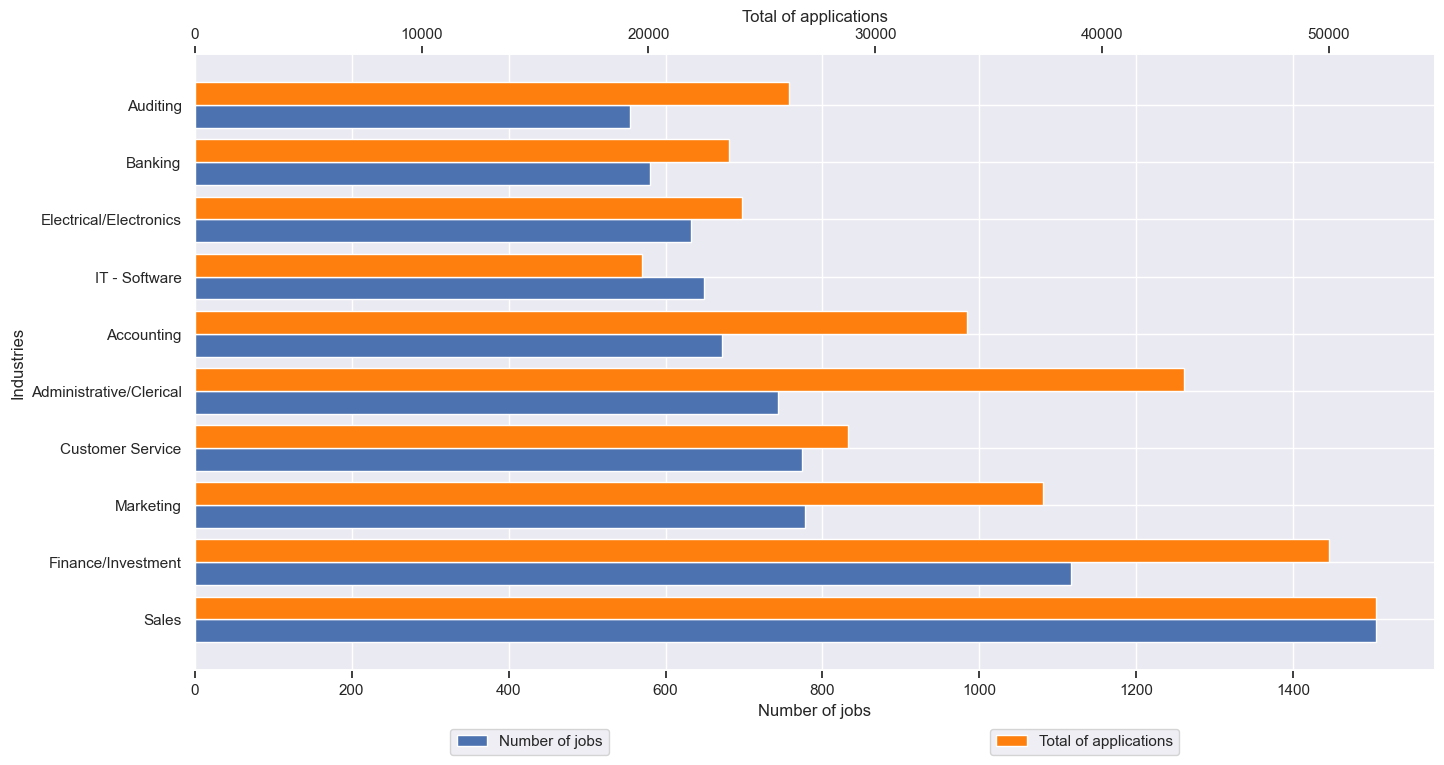

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
y_axis = np.arange(len(industries_highnjobs_df['industries']))
ax.barh(y_axis - 0.2, industries_highnjobs_df['numOfJobs'], 0.4)
ax.set_xlabel("Number of jobs")
ax.set_ylabel("Industries")
# ax.tick_params(left=False)
ax.legend(['Number of jobs'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twiny()
ax2.barh(y_axis + 0.2, industries_highnjobs_df['totalOfApplications'], 0.4,color='#fe7f0e')
ax2.set_xlabel("Total of applications")
ax2.grid(False)
# ax2.tick_params(right=False)
ax2.legend(['Total of applications'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.yticks(y_axis, industries_highnjobs_df['industries'])
plt.show()

##### *Top 10 industries which have high number of applications*

In [44]:
industries_highnapps_df = industries_df.sort_values\
                    (by = 'totalOfApplications', ascending = False)[:10]
industries_highnapps_df

,industries,numOfJobs,totalOfApplications
64,Sales,1505,52059
26,Finance/Investment,1117,49998
1,Administrative/Clerical,743,43607
47,Marketing,778,37414
0,Accounting,672,34059
13,Customer Service,774,28804
36,Human Resources,411,28347
11,Civil/Construction,490,27276
7,Auditing,555,26217
18,Electrical/Electronics,632,24116


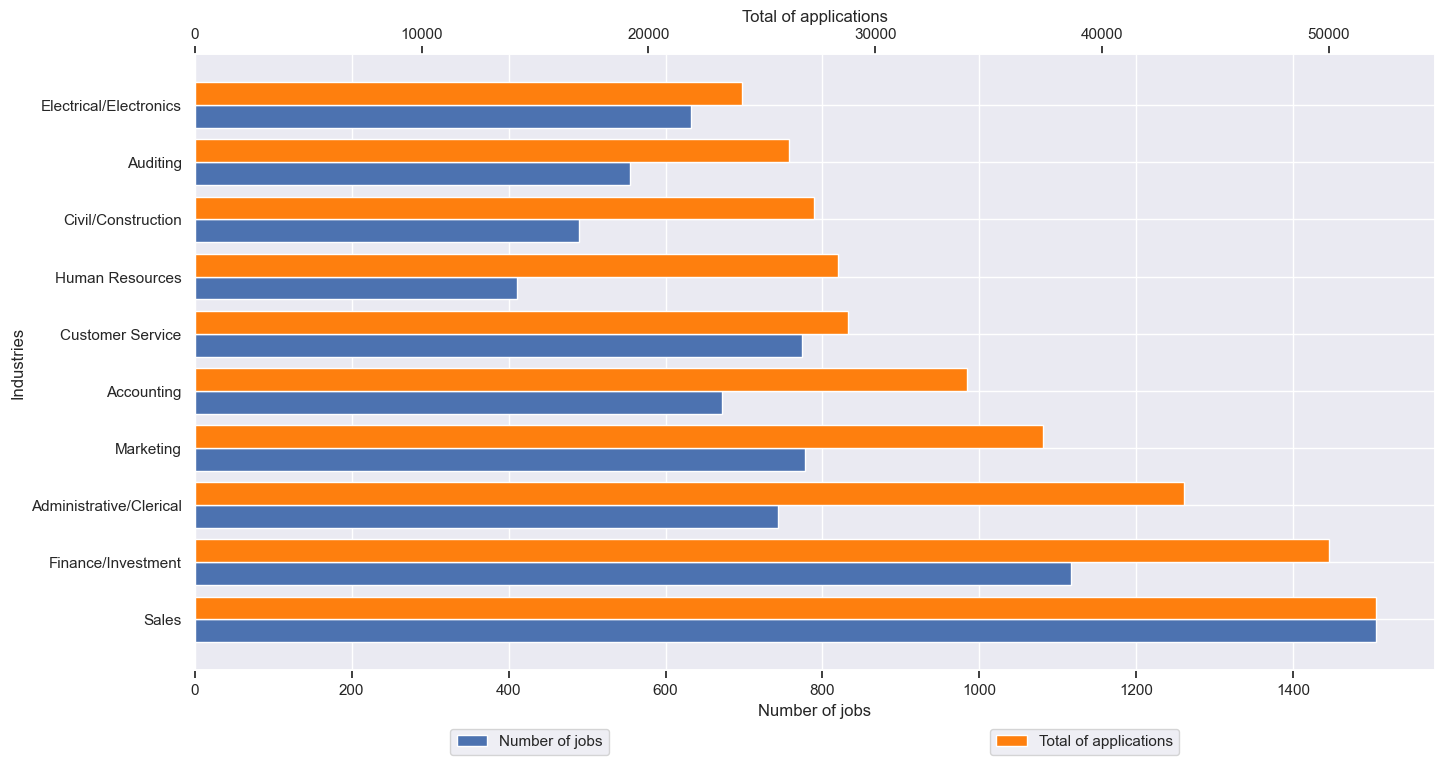

In [45]:
fig, ax = plt.subplots(figsize=(16,8))
y_axis = np.arange(len(industries_highnapps_df['industries']))
ax.barh(y_axis - 0.2, industries_highnapps_df['numOfJobs'], 0.4)
ax.set_xlabel("Number of jobs")
ax.set_ylabel("Industries")
# ax.tick_params(left=False)
ax.legend(['Number of jobs'],loc='lower left',bbox_to_anchor=(0.2, -0.15))

ax2 = ax.twiny()
ax2.barh(y_axis + 0.2, industries_highnapps_df['totalOfApplications'], 0.4,color='#fe7f0e')
ax2.set_xlabel("Total of applications")
ax2.grid(False)
# ax2.tick_params(right=False)
ax2.legend(['Total of applications'],loc='lower right',bbox_to_anchor=(0.8, -0.15))
plt.yticks(y_axis, industries_highnapps_df['industries'])
plt.show()

##### **Review:**

+ As we see in two graph of top 10 industries which have high number of jobs and hign number of applications, top 10 industries don't seem to have changed too much, *Sales* and *Finance/Investment* always in top highest ranking. 

+ One thing we can see in these graphs is *IT - Software*, although it has number of jobs in top 10 but it doesn't has high number of applications (When I do this project last year, it always in top 10, so you can see the labor market will be changed so fast) so this jobs maybe not trending in today.

<h5><b><i>Question 5: </i></b> At the trending industries,what skills which they will require? And sort it by needed order</h5>

##### *Benefits of answering questions:*

When having this information, each group of people who want to choose jobs from top 10 trending industries will have an their own benefits for them, such as: 

+ For *students, workers*: Identifying the skills they will study after chose the jobs from top 10 trending industries. Avoid studying some wrong skills, from that they won't keep up with the common trend of these jobs.

+ For *universities, training centers*: Opening more training fields about these skills for the trending industries. Making sure students after graduating will have enough skills to meet needs of recruiters.

+ For *recruiters, business*: Searching for workers who have these skills to meet needs of their companies.



##### *Analysis to answer questions:*

In [47]:
# Using the dataframe "industries_highnapps_df" from question 4
top_10_industries_hnapps = list(industries_highnapps_df['industries'])
top_10_industries_hnapps

['Sales',
 'Finance/Investment',
 'Administrative/Clerical',
 'Marketing',
 'Accounting',
 'Customer Service',
 'Human Resources',
 'Civil/Construction',
 'Auditing',
 'Electrical/Electronics']

In [48]:
skills_top_10_industries_df = skills_industries_df[skills_industries_df['industries']\
                                                   .isin(top_10_industries_hnapps) ]
skills_top_10_industries_df

,industries,skills
0,Customer Service,Kênh MT
0,Customer Service,Hàng Tiêu Dùng
0,Customer Service,FMCG
0,Customer Service,Bán Hàng
0,Customer Service,Quản Lý Doanh Số
...,...,...
8971,Finance/Investment,Risk
8971,Finance/Investment,Business consulting
8971,Finance/Investment,Audit
8971,Finance/Investment,Business Strategy consulting


In [49]:
skills_top_10_industries_df['skills'].value_counts().index

Index(['English', 'Kinh Doanh', 'Chăm Sóc Khách Hàng', 'Bán Hàng', 'Kế Toán',
       'Tiếng Anh', 'Tìm Kiếm Khách Hàng', 'Tài Chính', 'Kế Toán Tổng Hợp',
       'Accounting',
       ...
       '3D Software', 'Ngành Nhôm Kính', 'Analyzing Statistics', 'IT Strategy',
       'Video Advertising', 'Illustration', 'Video Making', 'Manage Projects',
       'SMT Maintenance', 'Thu Mua Kỹ Thuật'],
      dtype='object', length=6270)

In [50]:
def convert_English_to_Vietnamese(text): 
    lang, confidence = langid.classify(text)
    if lang == 'en':
        try:
            translation = translate(text, 'vi', 'en')
            return translation
        except Exception as e:
            print(f"Translation error: {e}")
            return text
    else: 
        return text

I used the function "convert_English_to_Vietnamese" to translate English text to VietNamese but it still has some error translation and running process will take an hour if RAM of computer is small. So I will save it in csv and edit it after running.
(If you want try to run it, you can run this code below)

In [51]:
# skills_top_10_industries_df['skills'] = skills_top_10_industries_df['skills'].astype(str)\
# .apply(convert_English_to_Vietnamese)
# skills_top_10_industries_df['skills']

In [52]:
# skills_top_10_industries_df.to_csv('data/skills.csv',index = False)

In [53]:
# Copy it from csv
skills_df = pd.read_csv('data/skills.csv')
skills_top_10_industries_df.loc[skills_top_10_industries_df['industries'].index, 'skills'] = skills_df['skills']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16896\3401576276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skills_top_10_industries_df.loc[skills_top_10_industries_df['industries'].index, 'skills'] = skills_df['skills']


In [54]:
# Edit it
skills_top_10_industries_df['skills'] = skills_top_10_industries_df['skills'].replace('English','Tiếng Anh')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16896\4272575144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skills_top_10_industries_df['skills'] = skills_top_10_industries_df['skills'].replace('English','Tiếng Anh')


In [55]:
skills_rank_df = skills_top_10_industries_df.groupby('industries').value_counts().reset_index()
skills_rank_df = skills_rank_df.rename(columns = { 0: 'numOfUsed'})
skills_rank_df

,industries,skills,numOfUsed
0,Accounting,Tiếng Anh,101
1,Accounting,Kinh Doanh,61
2,Accounting,Bán Hàng,58
3,Accounting,Tìm Kiếm Khách Hàng,55
4,Accounting,Chăm Sóc Khách Hàng,52
...,...,...,...
5686,Sales,English Skill,1
5687,Sales,Marketing Strategy Development,1
5688,Sales,Vệ Sinh Công Nghiệp,1
5689,Sales,Dự báo ngân sách,1


In [56]:
top_10_industries = list(skills_rank_df['industries'].unique())
top_10_industries

['Accounting',
 'Administrative/Clerical',
 'Auditing',
 'Civil/Construction',
 'Customer Service',
 'Electrical/Electronics',
 'Finance/Investment',
 'Human Resources',
 'Marketing',
 'Sales']

Each trending industries has a lot of skills so we will only get 7 top skills for each industry 

In [66]:
list_skills_name = []
list_skills_value = []
for industry in top_10_industries: 
    skills_rank_each_job = skills_rank_df[skills_rank_df['industries'] == industry]
    list_skills_name.append(list(skills_rank_each_job['skills'].iloc[0:7]))
    list_skills_value.append(list(skills_rank_each_job['numOfUsed'].iloc[0:7]))

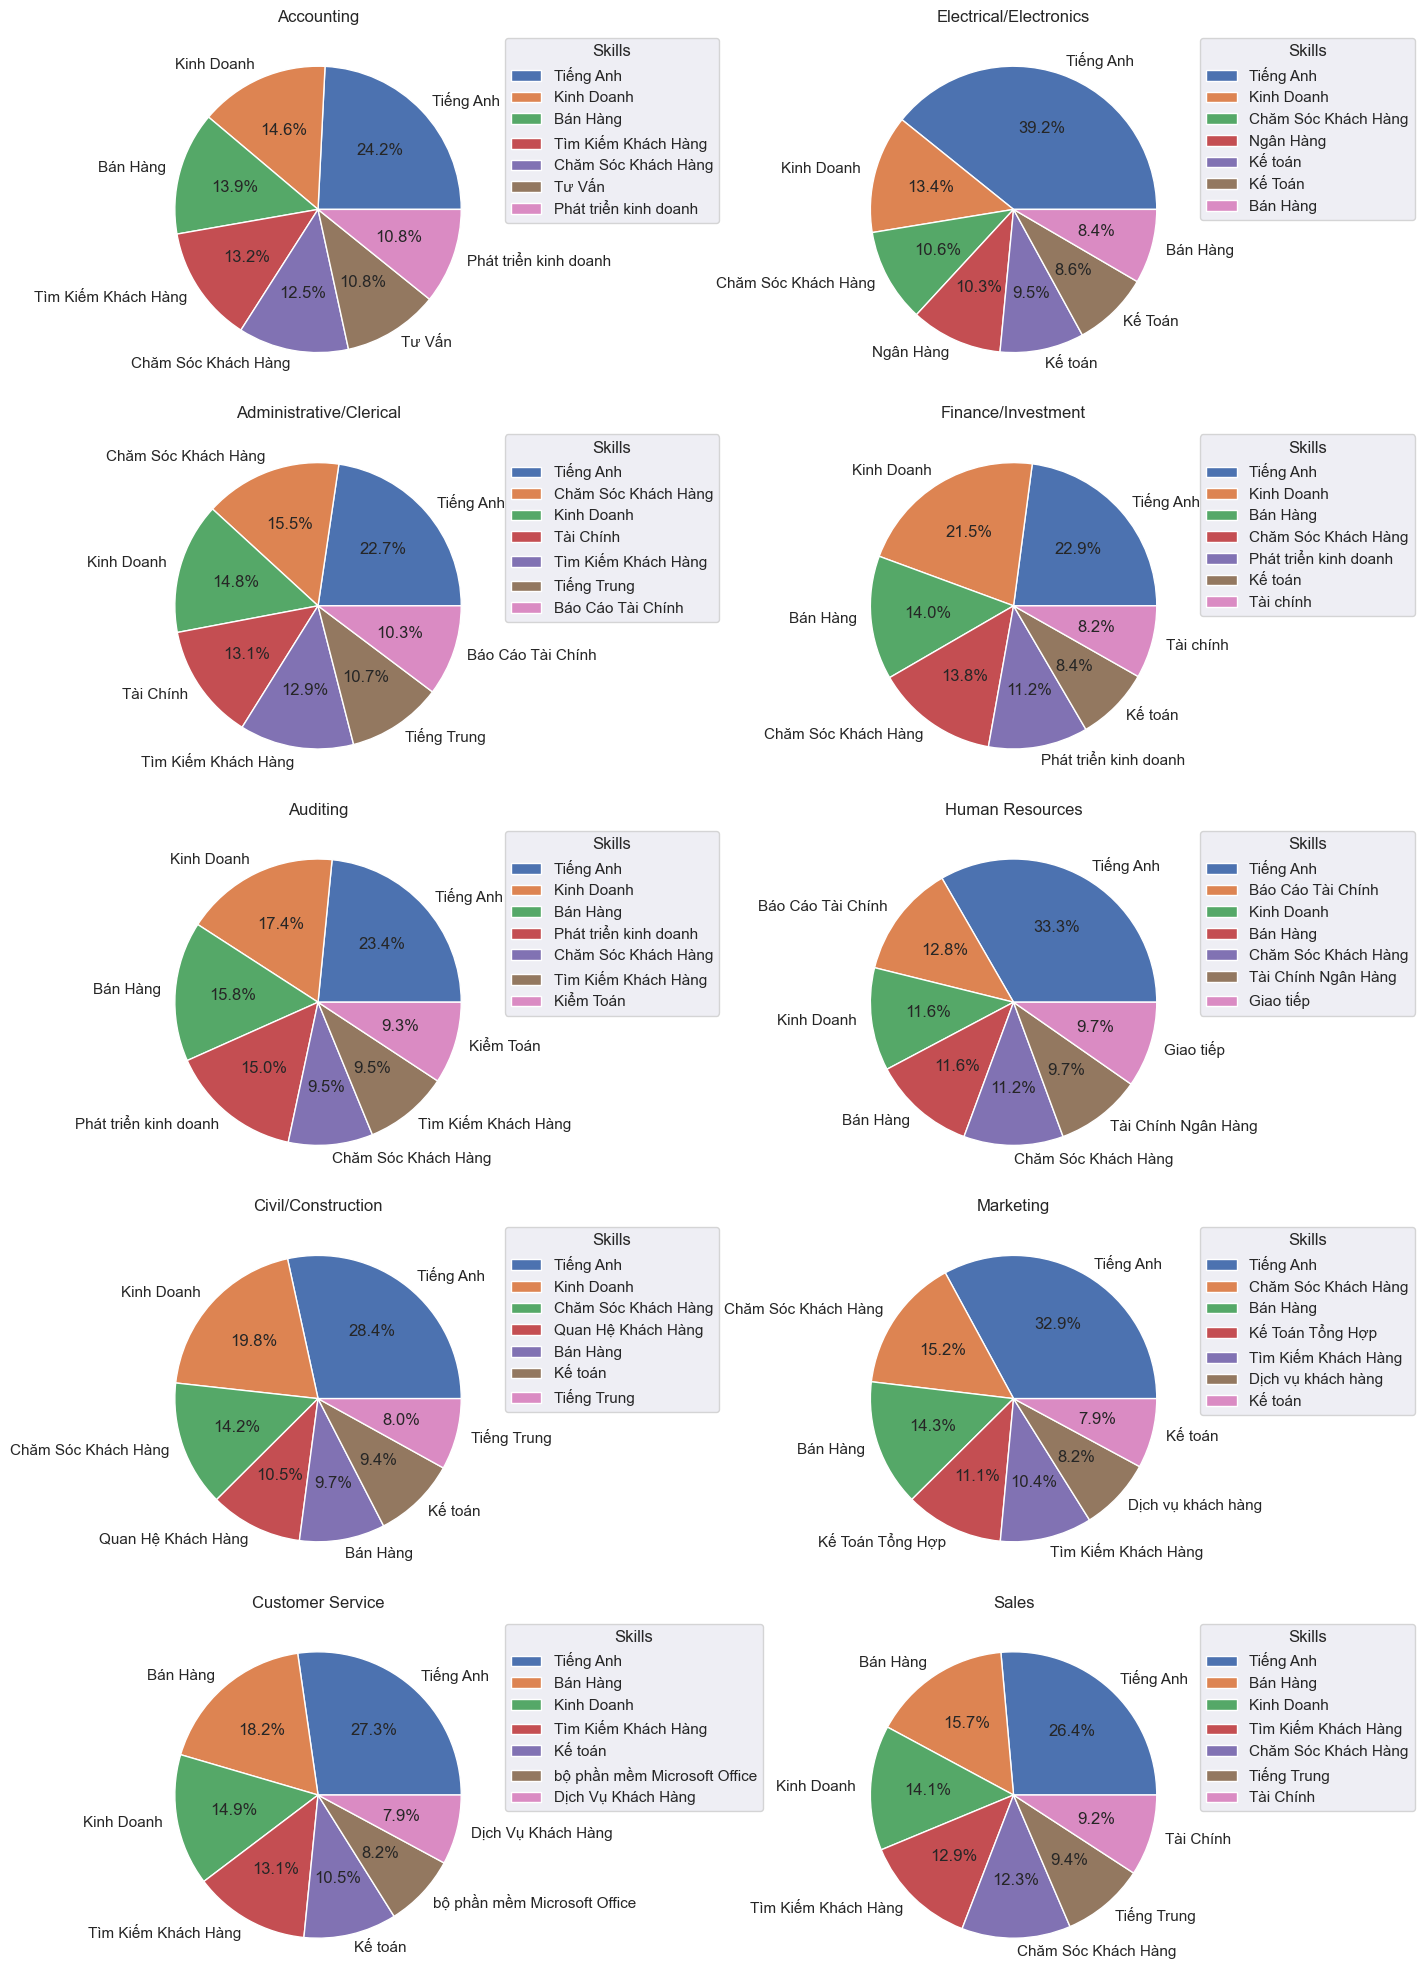

In [70]:
fig, ax = plt.subplots(5,2)
fig.set_figwidth(14)
fig.set_figheight(20)
idx = 0
for i in range(2):
    for j in range(5):
        ax[j,i].pie(list_skills_value[idx],labels = list_skills_name[idx],autopct='%1.1f%%')
        ax[j,i].legend(title = "Skills",loc='best',bbox_to_anchor=(1, 1))
        ax[j,i].set_title(top_10_industries[idx])
        idx+=1
plt.tight_layout()
plt.show()

##### **Review:**

+ All the industries require English skills. It reflected VietNam's market correctly because VietNam currently want to expand to foreign countries and English will be main tool for these hopes. Besides, all interesting documents for each jobs always wrote by English, so English will be the first priorty which they need to learn. 

+ When looking at the graph above, "Kinh doanh" skills can be a skill which we need to study because almost trending jobs all require this skills. Maybe the trend of current social is economy because AI and data science are growing up and the trend of social last year is went down.

+ From that, looking at this graph above will help us having a overview about the trend of current social